# Projeto 2 (1S2022)

### Instruções

1. Quando você terminar os exercícios do projeto, vá até o menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este projeto e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
3. Atente-se ao prazo de entrega definido na tarefa do MS Teams. Entregas fora do prazo não serão aceitas.
4. **O projeto pode ser resolvido em grupos de no MÁXIMO 3 alunos**.
5. Todas as questões têm o mesmo peso.
6. Não se esqueça de colocar seu(s) nome(s) e número(s) de matrícula no campo abaixo. Substitua os nomes que já estão no campo abaixo.
7. Você pode consultar todo o material de aula.
8. A interpretação faz parte do projeto. Leia o enunciado de cada questão atentamente!
9. Boa sorte!

**Nomes e matrículas**:

1. Nome do primeiro aluno - Matrícula do primeiro aluno
2. Nome do segundo aluno - Matrícula do segundo aluno
3. Nome do terceiro aluno - Matrícula do terceiro aluno

## Exercícios

### 1) Exercício sobre o modelo do neurônio de McCulloch e Pitts.

Usando-se o modelo do neurônio de McCulloch e Pitts, qual seria o valor do **limiar de ativação**, $\theta$, para classificar a função booleana dada pela tabela abaixo? Desenhe a função de ativação e o neurônio, indicando quais entradas são inibitórias, caso haja alguma.

**DICAS**: 

+ Como este exercício é teórico, portanto, anexe o documento, em formato pdf, com sua resposta.
+ Você pode precisar ter uma ou mais entradas inibitórias para encontrar o valor de $\theta$.
    + Entradas inibitórias são entradas que têm seus valores **negados** (ou seja, o complemento).
+ Os atributos de entrada são `x1`, `x2` e `x3` e o valor esperado é dado por `y`.

| x1 | x2 | x3 | y |
|:--:|:--:|:--:|:-:|
|  0 |  0 |  0 | 0 |
|  0 |  0 |  1 | 0 |
|  0 |  1 |  0 | 0 |
|  0 |  1 |  1 | 0 |
|  1 |  0 |  0 | 0 |
|  1 |  0 |  1 | 0 |
|  1 |  1 |  0 | 1 |
|  1 |  1 |  1 | 0 |

### 2) Exercício sobre o uso da rede Multi-Layer Perceptron (MLP) para classificação.

Neste exercício, você irá usar **grid search** para encontrar os melhores parâmetros para que uma rede MLP separe as classes do conjunto das duas luas.

1. Execute a célula de código abaixo e analise a figura gerada. A figura mostra os exemplos de **duas classes**.

**DICAS**

+ Note que na célula abaixo, o conjunto de dados já é dividido em conjuntos de treinamento e validação.

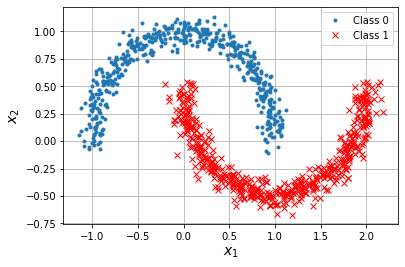

In [33]:
# Import all necessary libraries.
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Reset PN-sequence generator.
seed = 42
np.random.seed(seed)

# Define number of samples.
N = 1000

# Generate dataset.
X, y = make_moons(N, noise=0.07, random_state=seed)

# Plot the two classes.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

2. Use busca exaustiva (`GridSearchCV`) e o conjunto de treinamento para treinar um objeto da classe `MLPClassifier`, com **uma única camada escondida**, para encontrar os valores ideais para alguns parâmetros da rede MLP de tal forma que o modelo classifique perfeitamente as duas classes.

O objeto da classe `GridSearchCV` automatiza o processo de busca pelo melhor conjunto de parâmetros de um modelo, neste caso, os parâmetros do objeto da classe `MLPClassifier`, mas poderia ser de qualquer outro modelo que necessite de ajuste fino de seus parâmetros. O dicionário de parâmetros, chamado no código de exemplo de `parameters`, que é passado para o `GridSearchCV` contém os parâmetros do objeto da classe `MLPClassifier` que desejamos testar e verificar qual combinação deles resulta no melhor resultado. Portanto, o `GridSearchCV` automatiza os testes que vão descobrir dentre esses valores do dicionário `parameters` quais são os melhores para cada parâmetro. Portanto, o que o `GridSearchCV` faz é configurar o objeto da classe `MLPClassifier` com todas as combinações possíveis dos parâmetros passados no dicionário `parameters` e retormnar, ao final, a melhor combinação destes parâmetros.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPClassifier` configure os parâmetros de entrada `max_iter` e `solver` com os valores 1000 e `'lbfgs'`, respectivamente.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de nós na camada escondida, (ii) a função de ativação ideal dos nós e (iii) o valor da semente do gerador de sequências pseudo-aleatórias.
+ O `GridSearchCV` deve testar o  seguinte conjunto de parâmetros e valores:
    * `'hidden_layer_sizes'` com os valores `()`, `(2,)`, `(3,)`, `(4,)`, `(5,)`, e `(6,)`.
    * `'activation'` com os valores `'logistic'`, `'tanh'`, e `'identity'`.
    * `'random_state'`  com os valores `0`, `1`, `42`, `51`, `69`, e `250`.
+ O treinamento pode ser demorado, então pegue um café e tenha paciência.
+ Ao instanciar o objeto da classe `GridSearchCV`, use um número de folds para o k-Fold igual a 5, ou seja, `cv=5`.
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [1]:
# Digite aqui o código do exercício.

3. Após o treinamento, imprima quais foram os melhores valores encontrados pela grid search.

**DICAS**:
    
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [2]:
# Digite aqui o código do exercício.

4. Plote a matriz de confusão da rede MLP para os exemplos do **conjunto de validação**.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_metrics.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [1]:
# Digite aqui o código do exercício.

5. Qual é a acurácia da rede MLP?

**DICAS**

+ Use o conjunto de validação para calcular a acurácia.

In [4]:
# Digite aqui o código do exercício.

6. Crie uma figura mostrando as regiões de decisão da rede MLP.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_metrics.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [5]:
# Digite aqui o código do exercício.

### 3) Exercício sobre o uso da rede Multi-Layer Perceptron (MLP) para regressão.

Em telecomunicações, podemos encontrar em determinados problemas, variáveis aleatórias que não possuem formas conhecidas para suas funções densidade de probabilidade (FDP). Nestes casos, podemos recorrer à aproximação de funções como uma forma de encontrar uma função que aproxime os valores observados desta variável aleatória. Portanto, neste exercício, iremos usar um objeto da classe `MLPRegressor` para encontrar uma função que aproxime o melhor possível os dados observados de uma variável aleatória.

1. As observações da variável aleatória com FDP desconhecida podem ser geradas com o trecho de código abaixo. Portanto, execute código abaixo e analise o resultado.

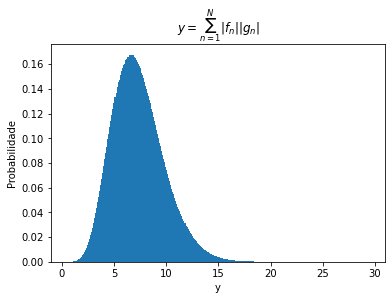

In [204]:
# Importa bibliotecas necessárias.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Reseta gerador de sequências pseudo-aleatórias.
seed = 42
np.random.seed(seed)

# Número de amostras da variável aleatória.
M = 10000000

# Número de termos do somatório.
N = 4

# Gera uma das variáveis aleatórias.
f = 1.1 + (1/(np.sqrt(2)))*(np.random.randn(N,M) + 1j*np.random.randn(N,M))
f = np.abs(f)

# Gera outra variável aleatória.
g = 1.1 + (1/(np.sqrt(2)))*(np.random.randn(N,M) + 1j*np.random.randn(N,M))
g = np.abs(g)

# Gera variável aleatória com FDP desconhecida.
h = np.sum(f*g, axis=0)

# Número de divisões do histograma.
bins = 300
y, X, p = plt.hist(h, bins=bins, density=True)
plt.title('$y = \sum_{n=1}^{N} |f_n||g_n|$')
plt.ylabel('Probabilidade')
plt.xlabel('y')
plt.show()

# Redimensionando o vetor de atributos.
X = X[0:len(X)-1].reshape(bins,1)

2. Use busca exaustiva (`GridSearchCV`) e o conjunto total de dados para treinar um objeto da classe `MLPRegressor`, com **uma única camada escondida**, para encontrar os valores ideais para alguns parâmetros da rede MLP de tal forma que o modelo aproxime a PDF.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPRegressor` configure os parâmetros de entrada `max_iter` e `solver` com os valores 5000 e `'lbfgs'`, respectivamente.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de nós na camada escondida, (ii) a função de ativação ideal dos nós e (iii) o valor da semente do gerador de sequências pseudo-aleatórias.
+ O `GridSearchCV` deve testar o  seguinte conjunto de parâmetros e valores:
    * `'hidden_layer_sizes'` com os valores `(2,)`, `(3,)`, `(4,)`, `(5,)`, `(6,)`, `(7,)`, `(8,)`, `(9,)`, e `(10,)`.
    * `'activation'` com os valores `'logistic'`, e `'tanh'`.
    * `'random_state'`  com os valores `0`, `1`, `42`, `51`, `69`, e `250`.
+ O treinamento pode ser demorado, então pegue um café e tenha paciência.
+ Ao instanciar o objeto da classe `GridSearchCV`, use um número de folds para o k-Fold igual a 5, ou seja, `cv=5`.
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [6]:
# Digite aqui o código do exercício.

3. Após o treinamento, imprima quais foram os melhores valores encontrados pela grid search.

**DICAS**:
    
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [7]:
# Digite aqui o código do exercício.

4. Qual é o erro quadrático médio (MSE) da rede MLP?

**DICAS**

+ Use o conjunto total de amostras para calcular o erro.

In [8]:
# Digite aqui o código do exercício.

5. Apresente uma figura comparando a predição feita pela MLP com os dados originais.

**DICAS**:

+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [9]:
# Digite aqui o código do exercício.

### 4) Exercício sobre classificação.

Neste exercício, iremos comprarar a classificação softmax com a MLP para o conjunto dos dígitos escritos à mão.

1. Execute a célula de código abaixo e veja algumas das imagens deste conjunto de dados. A figura mostra as 10 primeiras imagens do conjunto dos dígitos escritos à mão.

**DICAS**

+ Note que na célula abaixo, o conjunto de dados já é dividido em conjuntos de treinamento e validação e na sequência, os atributos são padronizados.

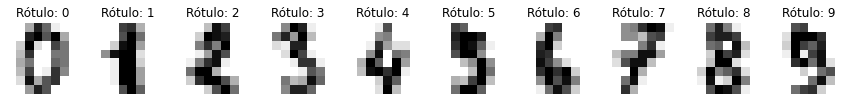

In [9]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Reset PN-sequence generator.
seed = 42
np.random.seed(seed)

# Loading handwritten digits dataset.
X, y = load_digits(return_X_y=True)

# Pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Scale data to have zero mean and unit variance.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Plot some of the images.
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 2))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Rótulo: {label}")

2. Treine um regressor Softmax.

**DICAS**:

+ Use um objeto da classe `LogisticRegression` com o parâmetro `multi_class` configurado com a string `'multinomial'`.
+ Use a semente (seed) definida no item 1 deste exercício para configurar o parâmetro `random_state` da classe `LogisticRegression`.
+ O restante dos parâmetros da classe devem ser configurados com seus valores padrão. Portanto, não altere nenhum outro parâmetro a não ser os parâmetros `multi_class` e `random_state` conforme explicado acima.

In [10]:
# Digite aqui o código do exercício.

3. Calcule e imprima a acuária do regressor Softmax.

**DICAS**

+ Use o conjunto de validação para calcular a acurácia.

In [11]:
# Digite aqui o código do exercício.

4. Plote a matriz de confusão do regressor Softmax para os exemplos do **conjunto de validação**.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_metrics.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [2]:
# Digite aqui o código do exercício.

5. Use busca exaustiva (`GridSearchCV`) e o conjunto de treinamento para treinar um objeto da classe `MLPClassifier` para encontrar os valores ideais para alguns parâmetros da rede MLP de tal forma que o modelo classifique o conjunto de dados.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPClassifier` configure o parâmetro de entrada `max_iter` com o valor 1000.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de nós na(s) camada(s) escondida(s), (ii) a função de ativação ideal dos nós, (iii) o solver e (iv) o valor da semente do gerador de sequências pseudo-aleatórias.
+ O `GridSearchCV` deve testar o  seguinte conjunto de parâmetros e valores:
    * `'hidden_layer_sizes'` com os valores `()`, `(20,)`, `(30,)`, `(60,30)`, `(80,40)`, `(100,50)`, e `(200,100)`.
    * `'activation'` com os valores `'logistic'`, `'tanh'`, e `'relu'`.
    * `'solver'`  com os valores `'lbfgs'` e `'adam'`.
    * `'random_state'`  com os valores `0`, `1`, `42`, `51`, `69`, `71`, `89`, e `103`.
+ O treinamento pode ser demorado, então pegue um café e tenha paciência. Para agilizar o treinamento, configure o parâmetro `n_jobs` da classe `GridSearchCV` com o valor `-1`, ou seja, `n_jobs=-1`.
+ Ao instanciar o objeto da classe `GridSearchCV`, use um número de folds para o k-Fold igual a 5, ou seja, `cv=5`.
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [13]:
# Digite aqui o código do exercício.

6. Após o treinamento, imprima quais foram os melhores valores encontrados pelo grid search.

**DICAS**:
    
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [14]:
# Digite aqui o código do exercício.

7. Calcule e imprima a acuária da rede MLP.

**DICAS**

+ Use o conjunto de validação para calcular a acurácia.

In [15]:
# Digite aqui o código do exercício.

8. Plote a matriz de confusão da rede MLP para os exemplos do **conjunto de validação**.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_metrics.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [3]:
# Digite aqui o código do exercício.

9. Observando a matriz de confusão e a acurácia, responda

+ Qual dos dois modelos apresenta o melhor desempenho?
+ Você consegue explicar o motivo desta diferença?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

### 5) Exercício sobre o uso da rede Multi-Layer Perceptron (MLP) para prever o consumo de combustível.

Este exercício usará a base de dados Auto MPG para construir um modelo de regressão que preveja o consumo de combustível de automóveis do final dos anos 1970, início dos anos 1980. A base de dados fornece a descrição de vários automóveis desse período. Essa descrição possui os seguintes atributos: 

+ consumo de combustível em milhas por galão (`MPG`), 
+ número de cilindros (`Cylinders`), 
+ cilindrada do motor, em litros (`Displacement`), 
+ potência do motor (`Horsepower`), 
+ peso (`Weight`), 
+ aceleração (`Acceleration`), 
+ ano de fabricação do modelo (`Model Year`) e 
+ origem do modelo (`Origin`).
 
1. Execute a célula abaixo para importar os dados e as bibliotecas necessárias.

**DICAS**

+ Após a execução bem sucedida da célula abaixo, você visualizará as 5 primeiras linhas da base de dados.
+ O conjunto já é dividido em conjuntos de treinamento e validação.
+ A coluna `MPG` será o valor alvo (rótulos). Os rótulos são os valores que o modelo é treinado para predizer.

In [2]:
# Importe todas as bibliotecas necessárias.
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Reseta o gerador de sequências pseudo aleatórias.
seed = 42
np.random.seed(seed)

# Usando pandas para ler a base de dados.
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv('https://raw.githubusercontent.com/zz4fap/t320_aprendizado_de_maquina/main/projeto/auto-mpg.data', names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()

# Removendo as linhas com valores desconhecidos.
dataset = dataset.dropna()

# A coluna "Origin" é uma coluna categórica e não numérica. Logo, a convertemos para one-hot.
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

# Separando os dados em um conjunto de treinamento e outro de teste.
# São separados 80% para treinamento e 20% para validação.
X_train = dataset.sample(frac=0.8,random_state=0)
X_test = dataset.drop(X_train.index)

# Separando o valor alvo (rótulos) dos atributos. Os rótulos são os valores que o modelo é treinado para predizer.
y_train = X_train.pop('MPG')
y_test = X_test.pop('MPG')

# Imprimindo as dimensões do conjunto de treinamento.
print('Dimensões de X_train',X_train.shape)
print('Dimensões de y_train',y_train.shape)

# Mostrando os primeiro cinco exemplos.
dataset.tail()

Dimensões de X_train (314, 9)
Dimensões de y_train (314,)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


2. Padronize os conjuntos de treinamento e de validação.

**DICAS**:

+ Use a classe `StandardScaler` para padronizar os dados.
+ Lembre-se que os parâmetros de padronização (ou seja, média e variância) são obtidos a partir do conjunto de treinamento e apenas aplicados ao conjunto de validação.

In [17]:
# Digite aqui o código do exercício.

3. Use busca exaustiva (`GridSearchCV`) e o conjunto de treinamento para treinar um objeto da classe `MLPRegressor` para encontrar os valores ideais para alguns parâmetros da rede MLP.

**DICAS**:

+ Ao instanciar o objeto da classe `MLPRegressor` configure o parâmetro de entrada `max_iter` com o valor 2000, ou seja, `max_iter=2000`.
+ Use **grid search** (`GridSearchCV`) para encontrar: (i) o número ideal de nós na(s) camada(s) escondida(s), (ii) a função de ativação ideal dos nós, (iii) o solver e (iv) o valor da semente do gerador de sequências pseudo-aleatórias.
+ O `GridSearchCV` deve testar o  seguinte conjunto de parâmetros e valores:
    * `'hidden_layer_sizes'` com os valores `(16,)`, `(32,)`, `(64,)`, `(16,16)`, `(32,32)`, e `(64,64)`.
    * `'activation'` com os valores `'logistic'`, `'tanh'`, e `'relu'`.
    * `'solver'`  com os valores `'lbfgs'` e `'adam'`.
    * `'learning_rate_init'` com os valores `0.001`, `0.003`, `0.01`, e `0.03`.
    * `'random_state'`  com os valores `0`, `3`, `42`, e `51`.
+ O treinamento será demorado (em torno de 20 minutos), então pegue um café e tenha paciência. Para agilizar o treinamento, configure o parâmetro `n_jobs` da classe `GridSearchCV` com o valor `-1`, ou seja, `n_jobs=-1`.
+ Ao instanciar o objeto da classe `GridSearchCV`, use um número de folds para o k-Fold igual a 3, ou seja, `cv=3`.
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [22]:
# Digite aqui o código do exercício.

4. Após o treinamento, imprima quais foram os melhores valores encontrados pelo grid search.

**DICAS**:
    
+ Para resolver este item, se baseie no código do seguinte exemplo: [function_approximation.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/mlp/function_approximation.ipynb).
+ Os códigos do notebook de exemplo são apenas para guiar sua resolução deste item. Portanto, você não deve apenas copiá-lo, mas sim entender o que ele faz e ajustá-lo ao exercício. 

In [19]:
# Digite aqui o código do exercício.

5. Calcule e imprima o erro quadrático médio (MSE) para os conjuntos de treinamento e de validação.

**DICAS**:

+ Use a função `mean_squared_error` da biblioteca SciKit-Learn.

In [20]:
# Digite aqui o código do exercício.

6. Plote o histograma do erro entre os valores preditos pela rede MLP e os rótulos.

**DICAS**:

+ Use o conjunto de validação para plotar o histograma.
+ Use a função `hist` da biblioteca Matplotlib. Configure o parâmetro `bins` da função com o valor 25, ou seja, `bins=25`.
+ A documentação da função `hist` pode ser encontrada em:
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [21]:
# Digite aqui o código do exercício.

7. Após observar o histograma, responda:

+ Ao redor de qual valor está a maior parte dos erros?

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**